In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
DF = pd.read_csv("data2.tsv", delimiter="\s+", header=None)
Y = DF[1].values  

In [136]:
time = DF[0].values
n = Y.size

In [137]:
def X(time, b1, b2):
    time = np.asarray(time)  
    result = np.vstack((np.ones(time.shape), np.exp(b1 * time), np.exp(b2 * time))).T
    return result

In [144]:
def grid_search(Y,start,end,spacing):
    values = np.arange(start, end, spacing)
    Q_ = 100

    tolerance = 1e-10

    for b1 in values:
        for b2 in values:

            X_ = X(time,b1,b2)

            XtX = X_.T.dot(X_)

            if np.linalg.cond(XtX) < 1 / tolerance:

                alpha = np.linalg.inv(X_.T@(X_)).dot(X_.T@(Y))

                Q = (Y - X_@(alpha)).T.dot(Y-X_@(alpha))

                

        
                if Q < Q_:
                    b1_ = b1
                    b2_ = b2
                    alpha_ = alpha

    return alpha_,[b1_,b2_]



In [206]:
alpha_,b= grid_search(Y,7,12,.001) 
alpha_,b

(array([ 3.67815515e+00, -1.77526455e-04,  1.90672060e-02]),
 [11.999000000001669, 7.529000000000177])

In [147]:
predictions = X(time,b_[0],b_[1]).dot(alpha_)
predictions

array([ 3.69851319,  3.70009526,  3.70179979,  3.70363618,  3.70561457,
        3.70774587,  3.71004179,  3.71251496,  3.71517893,  3.71804831,
        3.72113878,  3.72446721,  3.72805173,  3.73191185,  3.73606851,
        3.74054422,  3.74536317,  3.75055134,  3.75613663,  3.762149  ,
        3.76862061,  3.77558599,  3.78308218,  3.79114892,  3.79982883,
        3.80916761,  3.81921426,  3.83002127,  3.84164487,  3.8541453 ,
        3.86758702,  3.88203903,  3.89757512,  3.9142742 ,  3.9322206 ,
        3.9515044 ,  3.97222176,  3.99447531,  4.01837448,  4.04403591,
        4.07158381,  4.10115038,  4.13287619,  4.16691062,  4.20341223,
        4.24254919,  4.28449967,  4.3294522 ,  4.37760605,  4.42917154,
        4.48437034,  4.54343571,  4.60661265,  4.67415803,  4.74634054,
        4.82344061,  4.9057501 ,  4.99357189,  5.08721923,  5.18701484,
        5.29328973,  5.40638174,  5.52663356,  5.65439043,  5.78999722,
        5.93379493,  6.08611641,  6.24728135,  6.4175902 ,  6.59

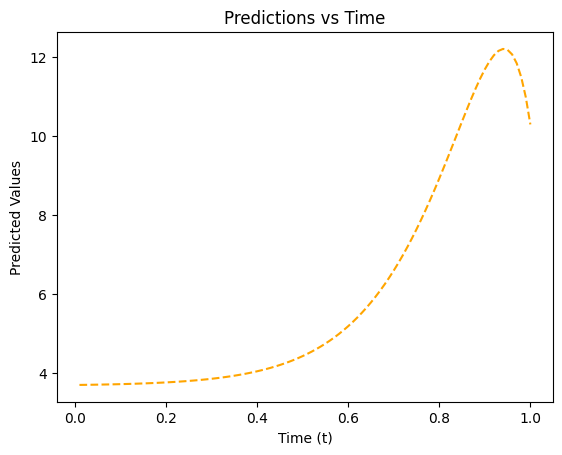

In [163]:
plt.plot(time, predictions, linestyle='--', color='orange', markersize=8)
plt.xlabel("Time (t)")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Time")
plt.show()

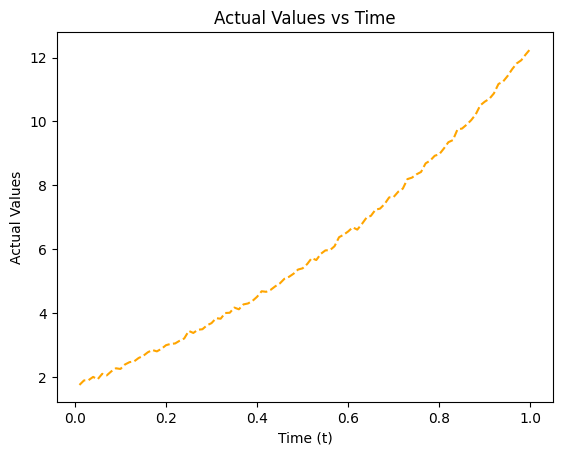

In [164]:
plt.plot(time, Y, linestyle='--', color='orange', markersize=8)
plt.xlabel("Time (t)")
plt.ylabel("Actual Values")
plt.title("Actual Values vs Time")
plt.show()

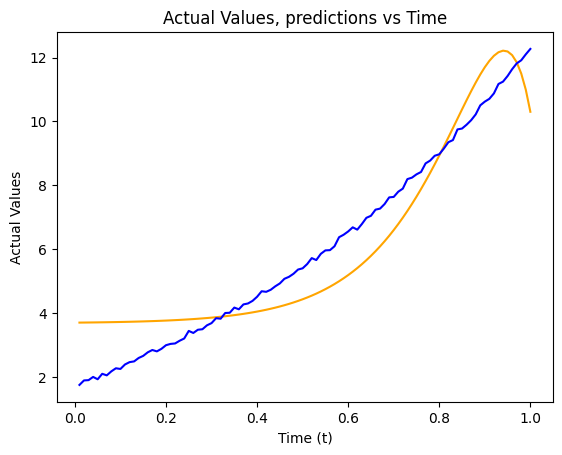

In [168]:
plt.plot(time, predictions, label='y_pred', color='orange')
plt.plot(time, Y, label='y_true', color='blue')
plt.xlabel("Time (t)")
plt.ylabel("Actual Values")
plt.title("Actual Values, predictions vs Time")
plt.show()

In [170]:
errors = Y - predictions 
errors  

array([-1.95211319, -1.81279526, -1.80549979, -1.70663618, -1.78201457,
       -1.61324587, -1.66384179, -1.54111496, -1.44737893, -1.47164831,
       -1.33413878, -1.26466721, -1.24485173, -1.14141185, -1.07966851,
       -0.97284422, -0.90486317, -0.95355134, -0.87913663, -0.771649  ,
       -0.73732061, -0.73028599, -0.65248218, -0.59064892, -0.36172883,
       -0.43536761, -0.34461426, -0.33932127, -0.22824487, -0.1716453 ,
       -0.03068702, -0.06163903,  0.10152488,  0.0927258 ,  0.2368794 ,
        0.1638956 ,  0.29577824,  0.30332469,  0.36052552,  0.46336409,
        0.60871619,  0.56174962,  0.59422381,  0.66888938,  0.72238777,
        0.82805081,  0.84760033,  0.8992478 ,  0.98349395,  0.96972846,
        1.04762966,  1.17506429,  1.05168735,  1.17934197,  1.21435946,
        1.14475939,  1.1840499 ,  1.37962811,  1.36368077,  1.36658516,
        1.38961027,  1.20431826,  1.25826644,  1.32650957,  1.25380278,
        1.30240507,  1.18318359,  1.16591865,  1.2033098 ,  1.03

<function matplotlib.pyplot.show(close=None, block=None)>

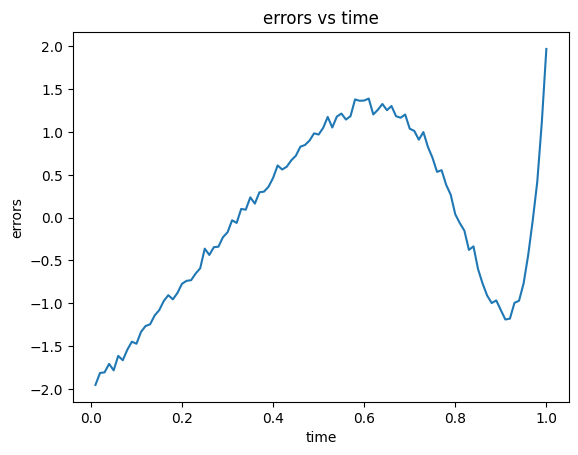

In [ ]:
plt.plot(time,errors)
plt.xlabel('time')
plt.ylabel('errors')
plt.title('errors vs time')
plt.show

In [209]:
total_error = np.sum(errors*errors)
total_error

99.9849699867092